In [1]:
import cv2
import pytesseract as tess
import numpy as np
import matplotlib.pyplot as plt
import time
from imutils import contours as sortCnt

In [2]:
cap = cv2.VideoCapture("Export_2020-01-21_165112/0 - 2020-01-19 14-51-01-172.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

2971.0

In [3]:
cap.set(cv2.CAP_PROP_POS_FRAMES,int(1500))

True

(576, 704, 3)


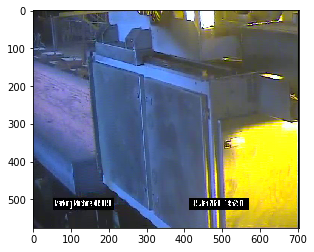

In [4]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

# OOOOOOOOOOOOOOOPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP

In [5]:
c = np.load("ocrPoints.npy")
#c[][0] = 107
#c[9][0] = 538
#c[0][2] = 80
c 

array([[100,  17,  80, 120],
       [153,  13,  58, 127],
       [202,  17,  57, 120],
       [253,  13,  55, 127],
       [297,  17,  55, 120],
       [350,  13,  55, 127],
       [390,  17,  57, 120],
       [441,  13,  50, 127],
       [490,  17,  49, 120],
       [537,  13,  60, 127]])

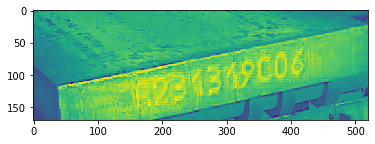

In [6]:
template = cv2.imread('templateWithMarking.jpg',0)
plt.imshow(template)

In [7]:
template = cv2.imread('blankSlab.jpg',0)
w, h = template.shape[::-1]

trig = 0
while(True):
    ret, img = cap.read()
    
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    
    
    template = cv2.imread('templateWithMarking.jpg',0)
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.85
    loc = np.where( res >= threshold)
  

  
    #for pt in zip(*loc[::-1]):
    if len(loc[0]) > 0:
        print(yes)



    #pts1 = np.float32([[115-150,417-7-50],[509+50,340-7-50],[115-150,490+50],[509+50,400+50]])
    pts1 = np.float32([[115,417-7],[509,340-7],[115,490],[509,400]])
    pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    #dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
    dst = cv2.warpPerspective(img_gray,M,(402,81))

    diff = cv2.bitwise_not( dst, template)
    _ , x = cv2.threshold(diff,21,255,cv2.THRESH_BINARY)

    #adThresh = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,191*3,25)
    erosion = cv2.erode(x,(3,3),iterations = 3)
    #blank = np.zeros(erosion.shape)
    _ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    '''blankSlab = cv2.imread("blankSlab.jpg",0)

    blankSlab = cv2.resize(blankSlab,(blankSlab.shape[1]*2,blankSlab.shap[0]*2), cv2.INTER_AREA)
    dst = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)'''

    print(len(cnts))
    if len(cnts) > 20:
        ocr = tess.image_to_string(erosion, config="--psm 13")
        if len(ocr) > 8:
            print(ocr)
            #if ocr[0] == "A" :
            blankSlab = cv2.imread("blankSlab.jpg",0)

            blankSlab = cv2.resize(blankSlab,(blankSlab.shape[1]*2,blankSlab.shape[0]*2), cv2.INTER_AREA)
            dst = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)

            #dstGray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
            diff = cv2.bitwise_not( dst, blankSlab)
            _,x = cv2.threshold(diff,18,255,cv2.THRESH_BINARY)
            erosion = cv2.erode(x,(3,3),iterations = 3)

            #erosion = cv2.copyMakeBorder( erosion, 500, 500 , 500, 500, cv2.BORDER_CONSTANT ,value = 255) # padding

            _ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
            cnts = sorted(contours, key = cv2.contourArea,reverse= True)
            cnts, bBox = sortCnt.sort_contours(cnts[1:11])
            textOCR = ""
            mul = 3
            for i in c:
                #x = erosion[i[1]-10:i[1]+120,i[0]:i[0]+64] #
                x = erosion[i[1]:i[1]+i[3],i[0]:i[0]+i[2]]
                dst = cv2.rectangle(dst,(i[0],i[1]-10),(i[0]+64,i[1]+120),(0,0,255),1)

                #cv2.imshow("x",x)
                try:
                    text = tess.image_to_string(x, lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")
                except SystemError:
                    print('An error occured trying to read the file.')
                if text == "":
                    text = "_"
                textOCR += text
                print(textOCR,"<----------------------")
                font = cv2.FONT_HERSHEY_SIMPLEX
                #img = cv2.putText(img," OCR on slab ={} ".format(text),(int(3+mul),int(300)), font, 1.5, (0,255,0), 2, cv2.LINE_AA)
                mul += 3
                print(text)


                trig += 10
                #break
                #time.sleep(.9)
                #cv2.rectangle
            #print(textOCR.count("_"),"<------------------------------------------LEN-LEN--------------------------------------------------")
            if textOCR.count("_") >= 5:
                trig = 0
    '''epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)'''

    #
    #cnts, bBox = sortCnt.sort_contours(cnts[1:11])

    #print(tess.image_to_string(erosion, lang = 'eng' , config="--psm 13 ",))


    ''' res = cv2.matchTemplate(img_gray[417-7-50-25:490+50+25,115-150-25:509+50+25],template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.7
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        #cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        save = img_gray.copy()
        print("yes")
        break
   ''' 
    if trig > 1:

        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img,(115+45,417-80),(509-20,490-30),(0,0,255),3)
        img = cv2.putText(img," OCR on slab:- {} ".format(str(textOCR)),(int(3),int(305)), font, .9, (150,255,1200), 3, cv2.LINE_AA)
        
            
    cv2.imshow('img ',img)
    cv2.imshow("dst",dst)
    cv2.imshow("erosion",erosion)
    
    '''if trig >= 1:
        time.sleep(52)
        break'''
    #cv2.imshow("ocr",erosion)
    #time.sleep(0.9)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

6
5
3
3
5
8
5
4
6
4
5
4
5
4
5
5
6
5
5
5
4
6
5
7
6
6
6
5
4
4
9
10
9
9
8
7
7
9
7
7
8
9
8
9
9
7
7
7
8
8
8
7
9
10
9
8
8
12
11
11
10
8
5
6
7
6
4
6
5
7
4
7
7
10
11
7
10
10
9
11
9
8
9
8
10
12
10
10
11
13
9
12
8
10
14
10
11
9
12
13
11
8
10
12
12
11
10
9
10
8
9
8
9
10
9
11
7
8
6
11
11
10
6
7
5
7
4
5
5
6
4
7
3
3
4
5
3
2
2
2
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
7
2
1
3
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
2
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
9
18
2
2
4
11
13
1
1
2
13
2
1
8
3
4
1
6
2
2
3
1
3
2
2
1
2
7
2
1
7
2
2
1
1
1
2
10
10
1
5
2
8
3
13
9
3
3
7
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
2
1
1
1
2
1
2
1
1
3
1
1
2
1
1
4
1
1
1

A4 <----------------------
4
A43 <----------------------
3
A434 <----------------------
4
A4345 <----------------------
5
A43453 <----------------------
3
A43453Q <----------------------
Q
A43453QC <----------------------
C
A43453QC6 <----------------------
6
A43453QC66 <----------------------
6
49
44
46
HOSABIOCNS
_ <----------------------
_
_4 <----------------------
4
_43 <----------------------
3
_434 <----------------------
4
_4345 <----------------------
5
_4345_ <----------------------
_
_4345_Q <----------------------
Q
_4345_QC <----------------------
C
_4345_QC_ <----------------------
_
_4345_QC_6 <----------------------
6
42
HOSASTOCDS
A <----------------------
A
A4 <----------------------
4
A43 <----------------------
3
A434 <----------------------
4
A4345 <----------------------
5
A4345_ <----------------------
_
A4345_Q <----------------------
Q
A4345_QC <----------------------
C
A4345_QC_ <----------------------
_
A4345_QC_4 <----------------------
4
47
HOSASUOCDS
A <--

R424 <----------------------
4
R4245 <----------------------
5
R4245_ <----------------------
_
R4245_0 <----------------------
0
R4245_0C <----------------------
C
R4245_0C_ <----------------------
_
R4245_0C_6 <----------------------
6
59
URS ASI0C0G
R <----------------------
R
R4 <----------------------
4
R43 <----------------------
3
R434 <----------------------
4
R4345 <----------------------
5
R4345_ <----------------------
_
R4345_0 <----------------------
0
R4345_0C <----------------------
C
R4345_0C6 <----------------------
6
R4345_0C66 <----------------------
6
57
OMS SI0C0G
R <----------------------
R
R4 <----------------------
4
R43 <----------------------
3
R434 <----------------------
4
R4345 <----------------------
5
R43455 <----------------------
5
R434550 <----------------------
0
R434550C <----------------------
C
R434550C0 <----------------------
0
R434550C06 <----------------------
6
61
OMS 5I0006
R <----------------------
R
R4 <----------------------
4
R43 <-------

Q4_45_ <----------------------
_
Q4_45_C <----------------------
C
Q4_45_C_ <----------------------
_
Q4_45_C__ <----------------------
_
Q4_45_C__6 <----------------------
6


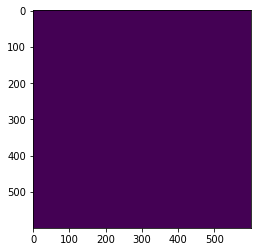

In [8]:
x = np.zeros((600,600))
plt.imshow(x)

In [9]:
type(textOCR.count("4"))

int

In [10]:
break

SyntaxError: 'break' outside loop (<ipython-input-10-6aaf1f276005>, line 4)

In [ ]:

def main():
    
    import cv2
    import numpy as np

    #x = str("http://192.168.1.188:8080")
    #cap = cv2.VideoCapture(x)
    x = np.zeros((600,600))

    while(True):
        #ret, img = cap.read()

        #img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


        cv2.imshow('img ',x)


        if cv2.waitKey(1) & 0xFF == ord('q'):
           break
        
    
    cap.release()
    cv2.destroyAllWindows()

      
if __name__== "__main__":
    main()

